In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit


In [52]:
df = pd.read_json('totalpassengers-full.json', orient='records')
df.head()

,month,level_1,value
0,1980-01,Total Passengers,566879
1,1980-02,Total Passengers,552263
2,1980-03,Total Passengers,597644
3,1980-04,Total Passengers,561218
4,1980-05,Total Passengers,587003


In [53]:
df['date_column'] = pd.to_datetime(df['month'])

In [54]:
df.head()

,month,level_1,value,date_column
0,1980-01,Total Passengers,566879,1980-01-01
1,1980-02,Total Passengers,552263,1980-02-01
2,1980-03,Total Passengers,597644,1980-03-01
3,1980-04,Total Passengers,561218,1980-04-01
4,1980-05,Total Passengers,587003,1980-05-01


In [55]:
df['year'] = df['date_column'].dt.year
df['month'] = df['date_column'].dt.month_name()
df.head()

,month,level_1,value,date_column,year
0,January,Total Passengers,566879,1980-01-01,1980
1,February,Total Passengers,552263,1980-02-01,1980
2,March,Total Passengers,597644,1980-03-01,1980
3,April,Total Passengers,561218,1980-04-01,1980
4,May,Total Passengers,587003,1980-05-01,1980


In [56]:
a = ['January', 'February', 'March']
b = [2019, 2018, 2020]

In [60]:
new =df[df['month'].isin(a)].copy()
new = new[new['year'].isin(b)].copy()

In [61]:
new.head()
len(new.index)

9

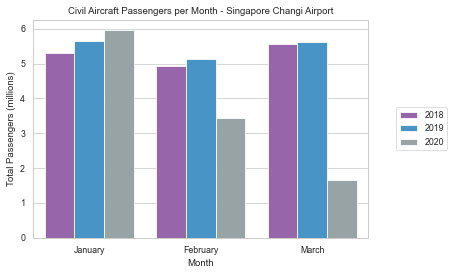

In [89]:
import seaborn as sns
import matplotlib.ticker as ticker
sns.set(style="whitegrid")
sns.set_context("paper")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))
ax = sns.barplot(x="month", y="value", data=new, hue="year")
ax.set(xlabel='Month', ylabel='Total Passengers (millions)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000000)))
ax.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.title("Civil Aircraft Passengers per Month - Singapore Changi Airport")
plt.show(ax)